# Geodatenanalyse 1


## Lösung: Termin 3 - Block 1

## Numerische und symbolische Berechnungen

In [1]:
import numpy as np
import mpmath as mp
import sympy as sp
import matplotlib.pyplot as plt

## Übung 1

Beim Stofftransport gilt die Diffusionsgleichung:

$\frac{\partial C}{\partial t} = D \frac{\partial^2 C}{\partial x^2}$

Für eine gleichförmige Anfangskonzentration $C_0$ gibt es eine analytische Lösung:

$C(x, t) = \frac{C_0}{2} \left(1 - erf\left( \frac{x}{\sqrt{4 D t}} \right) \right)$

*Hinweis*: *erf()* ist die Fehlerfunktion.

- **Augabe 1**: Zeichne die Konzentrationsverteilung für den Bereich $-5 < x < 5$ cm und die Zeiten $t_1 = 100$ s, $t_2 = 1000$ s und $t_3 = 10000$ s. Der Diffusionskoeffizient beträgt hier $D = 1.2 \cdot 10^{-8}$ $m^2/s$. Die Anfangskonzentration ist 0.8 $g/m^3$.

- **Aufgabe 2**: Die kleinste Konzentration, die das Messgerät erfassen kann ist $c = 0.001$ $g/m^3$. Wie groß ist der Diffusionskoeffizient, wenn nach $t = 10.000$ s an der Stelle $x = 0.04 m$ die Minimalkonzentration gemessen werden soll?

*Hinweis*: Bitte die Genauigkeit der Fließkommazahlen beachten.

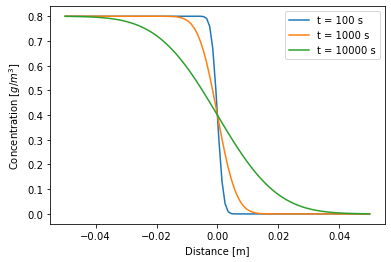

In [2]:
# Übung 1
# Aufgabe 1

x = np.linspace(-0.05, 0.05, 100)

c_0 = 0.8
D = 1.2e-8

# das ist der Trick für die Übergabe von NumPy arrays!
Erf = np.frompyfunc(mp.erf, 1, 1)

def C(x, c_0, t, D):
    return 0.5*c_0*(1 - Erf(x/(mp.sqrt(4*D*t))))

# die drei Konzentrationskurven in einer Abbildung
plt.plot(x, C(x, c_0, 100, D), label="t = 100 s")
plt.plot(x, C(x, c_0, 1000, D), label="t = 1000 s")
plt.plot(x, C(x, c_0, 10000, D), label="t = 10000 s")

# die Abbildung vollenden
plt.legend()
plt.xlabel('Distance [m]')
plt.ylabel('Concentration [$g/m^3$]')

plt.show()

In [3]:
# Übung 1
# Aufgabe 2
mp.dps = 30

c_detect = 0.001
c_0 = 0.8
t = 10000
x = 0.04

# die Konzentrationsdifferenz
def delta_C(D):
    return 0.5*c_0*(1 - mp.erf(x/(mp.sqrt(4*D*t)))) - c_detect

# die Lösung finden ...
D_new = mp.findroot(delta_C, 1.2e-8, tol=1e-30, solver='newton', verbose=True)

"D_new = {:.3e}".format(float(D_new))

x:     9.60849993829136095033e-9
error: 2.39150006170863896987e-9
x:     8.85311898992858550585e-9
error: 7.55380948362775444482e-10
x:     8.75390060267119548058e-9
error: 9.92183872573900252757e-11
x:     8.75216747745921056999e-9
error: 1.73312521198491058983e-12
x:     8.75216695055956721699e-9
error: 5.26899643352993332507e-16
x:     8.75216695055951852134e-9
error: 4.86956484609293927651e-23
x:     8.75216695055951852129e-9
error: 5.3642541555028802768e-29
x:     8.75216695055951852131e-9
error: 2.05103835357463069407e-29
x:     8.75216695055951852133e-9
error: 2.05103835357463069407e-29
x:     8.75216695055951852135e-9
error: 2.05103835357463069407e-29
x:     8.7521669505595185213e-9
error: 5.3642541555028802768e-29
x:     8.75216695055951852132e-9
error: 2.05103835357463069407e-29
x:     8.75216695055951852134e-9
error: 2.05103835357463069407e-29
x:     8.75216695055951852129e-9
error: 5.3642541555028802768e-29
x:     8.75216695055951852131e-9
error: 2.05103835357463069407e-29


'D_new = 8.752e-09'

## Übung 2

Erstelle eine Python-Abbildung der Theis'sche Typenkurve, wie sie für die Auswertung eines typischen Pumpversuches im gespannten Grundwasserleiter verwendet wird ([Theis, 1935](https://doi.org/10.1029/TR016i002p00519)).

*Hinweis*: Die Abbildung benötigt logarithmische Achsen!

*Frage*: Wie könnte man eine Auswertung in Python weiter machen?

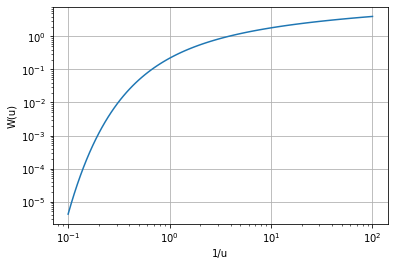

In [4]:
# Übung 2

# die Variable u
u = np.logspace(-2, 1, 100)

# ein Vektor für die Variable W
W = np.zeros(u.size)

# die Exponentialfunktion ...
def exp_int(x):
    return mp.exp(-x)/x

# eine Schleife für die Ergebnisse
for i, val in enumerate(u):
    # Integral ausrechnen ...
    W[i] = mp.quad(exp_int, [val, mp.inf])

# die Abbildung machen
plt.plot(1/u, W)

# logarithmische Achsen
plt.yscale("log")
plt.xscale("log")
plt.grid()

# Beschriftung
plt.xlabel('1/u')
plt.ylabel('W(u)')
plt.show()

## Übung 3

In einem Flussbett soll der vertikale Wasserfluss und der Wärmediffusionskoeffizient bestimmt werden ([Hatch et al., 2006](https://doi.org/10.1029/2005WR004787)). Dies kann durch die Ausbreitung der täglichen Temperaturschwankungen über die Tiefe erfolgen. Dabei werden Temperaturmessungen von zwei Messpunkte ($z_1$ und $z_2$) in unterschiedlichen Tiefen ($\Delta z$) der Sedimente des Flusses benötigt. Die Wärmetransportgleichung wird mit einer Sinus-Schwingung als obere Randbedingung gelöst. Diese Lösung kann man in eine Amplitudendämpfung und Phasenverschiebung überführen:

$ A_r = \frac{A_2}{A_1} = \exp \left( \frac{\Delta z}{2 D} \left( \nu - \sqrt{ \frac{\alpha + \nu^2}{2} } \right) \right)$

$\Delta_{\phi} = \frac{P \Delta z}{4 \pi D} \sqrt{ \frac{\alpha - \nu^2}{2} } $

Der Parameter $\alpha$ ist

$\alpha = \sqrt{v^4 + \left( \frac{8 \pi D}{P} \right)^2}$

- **Aufgabe 1**: Die Funktionen $A_r(v)$ und $\Delta \Phi(v)$ sollen jeweils für das Interval $-5 < v < 5$ m/Tag abgebildet werden. Hierbei ist $\Delta z = 0.2$ m, die Periode $P = 24$ Stunden, der Wärmediffusionskoeffizient $D = 1 \cdot 10^{-6}$ $m^2/s$.

- **Aufgabe 2**: In einem Feldversuch wurden eine Amplitudendämpfung von $A_r = 0.5$ und eine Phasenverschiebung von $\Delta \Phi = 244$ Minuten gemessen. Bestimme den vertikalen Wasserfluss und den Wärmediffusionskoeffizient.

*Hinweis*: Löse das nicht-lineare Gleichungssystem mit zwei Unbekannten.

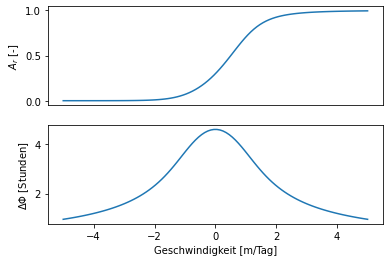

In [5]:
# Übung 3

# Aufgabe 1

# thermische Geschwindigkeit (m/tag)
v = np.linspace(-5, 5, 100)
# m/s
q = v/24/3600

# leere arrays vorbereiten
Ar = np.zeros(v.shape)
delphi = np.zeros(v.shape)

# die vorgegebenen Werte
P = 24*3600
dz = 0.2
D = 1e-6

# die Amplitudendämpfung
def A_r(v, D):
    alpha = np.sqrt(v**4 + ((8*np.pi*D)/P)**2)
    A_r = np.exp((dz/(2*D))*(v - np.sqrt((alpha + v**2)/2)))
    return A_r

# die Phasenverschiebung
def del_phi(v, D):
    alpha = np.sqrt(v**4 + ((8*np.pi*D)/P)**2)
    del_phi = ((P*dz)/(4*np.pi*D))*np.sqrt((alpha - v**2)/2)
    return del_phi

# 2 Abbildungen
plt.subplot(2, 1, 1)
plt.plot(v, A_r(q, D))
plt.ylabel('$A_r$ [-]')
plt.xticks([])

plt.subplot(2, 1, 2)
plt.plot(v, del_phi(q, D)/3600)
plt.xlabel('Geschwindigkeit [m/Tag]')
plt.ylabel('$\Delta \Phi$ [Stunden]')

plt.show()

In [6]:
# Übung 3

# Aufgabe 2

# die gemessenen Werte
A_r_meas = 0.5
del_phi_meas = 244*60

# die festen Parameter
P = 24*3600
dz = 0.2

# die Amplitudendämpfung
def A_r_zero(v, D):
    alpha = mp.sqrt(v**4 + ((8*mp.pi*D)/P)**2)
    A_r = mp.exp((dz/(2*D))*(v - mp.sqrt((alpha + v**2)/2)))
    return A_r_meas - A_r

# die Phasenverschiebung
def del_phi_zero(v, D):
    alpha = mp.sqrt(v**4 + ((8*mp.pi*D)/P)**2)
    del_phi = ((P*dz)/(4*mp.pi*D))*mp.sqrt((alpha - v**2)/2)
    return del_phi_meas - del_phi

# Lösung braucht eine Iteration ...
root = mp.findroot([A_r_zero, del_phi_zero], (0, 1e-6), solver='newton')

# das Ergebis formatiert ausgeben
print("v = {:.3f} m/d".format(float(root[0]*24*3600)))
print("D = {:.3e} m^2/s".format(float(root[1])))

v = 0.478 m/d
D = 1.173e-06 m^2/s


## ENDE